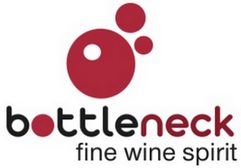

# Optimisation des données et de la gestion du stock 


### Fonction permettant de vérifier les clés primaires

In [1]:
# Création d'une fonction permettant de vérifier les clés primaires 
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

## Importation des librairies

In [2]:
# Librairies de calcul
import pandas as pd
import numpy as np

# Librairies de visualisation graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorer les warnings causés par l'importation .xlsx
import warnings
warnings.simplefilter("ignore")

## Importation des fichiers

In [3]:
# import des fichiers
erp = pd.read_excel("erp.xlsx")
web = pd.read_excel("web.xlsx")
liaison = pd.read_excel("liaison.xlsx")

## Lecture du fichier "erp"

In [4]:
# On observe les 5 premieres lignes de erp
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# On observe le nombre de colonnes, de lignes et le type du dataframe
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


## Analyse du fichier "erp"

In [6]:
# On Détecte les valeurs manquantes
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Aucune valeur n'est manquante

In [7]:
# Vérification des doublons dans product_id
erp.duplicated(['product_id']).sum()

0

Il n'y a aucun doublon

In [8]:
# Vérification de la clé primaire product_id
testerCle(erp, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


## <font color='MediumBlue'>Conclusion du fichier "erp"</font> 



#####  <font color='MediumBlue'> Le fichier "erp" ne présente pas de défaut, ni de doublons, il peut donc etre utilisé.  
#####  <font color='MediumBlue'> Sa clé primaire est product_id comprenant 825 lignes et 5 colonnes.</font> 

## Lecture du fichier "liaison"

In [9]:
# On observe les 5 premieres lignes de liaison
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Le fichier 'liaison' contient les deux clés primaires des fichiers 'erp' et 'web'

In [10]:
# On observe le nombre de colonnes, de lignes et le type du dataframe
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Nous devrons retrouver le meme nombre de lignes dans nos fichiers : 825 lignes pour 'produc_id' et 734 lignes pour 'id_web'

## Analyse du fichier "liaison"

In [11]:
# Vérification des doublons dans product_id
liaison.duplicated(['product_id']).sum()

0

In [12]:
# Vérification de la clé primaire product_id
testerCle(liaison, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


## <font color='MediumBlue'>Conclusion du fichier "liaison" </font> 

#####  <font color='MediumBlue'>Le fichier "liaison" ne présente pas de défaut, ni de doublons, il peut donc etre utilisé.  
##### <font color='MediumBlue'> Sa clé primaire est product_id comprenant 825 lignes et id_web 734 lignes. </font> 

## Lecture du fichier "web"

In [13]:
# On observe les 5 premieres lignes du dataframe
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous pouvons voir que ce fichier devra être traiter en profondeur,plusieurs éléménts nous le montre tels que des Nan ou informations au lieu d'un référence (bon cadeau)

In [14]:
# On observe le nombre de colonnes, de lignes et le type du dataframe
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

Le nombre de lignes ne correspond pas avec avec le fichier liaison qui est de 734, les colonnes n'ont pas le meme nombre de lignes

## Analyse du fichier "web"

In [15]:
web.sku.unique()

array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

Il y a des characteres différents tels que 'bon-cadeau-25-euros' ou '13127-1', nous verrons aprés la suppréssion des doublons si ils posent des problemes.

In [16]:
# Vérification des doublons dans sku
web.duplicated(['sku']).sum()

798

Il y a donc 798 doublons dans 'sku'

In [17]:
# On mesure la taille de web
web.size

42364

In [18]:
# on reprend la taille sans les doublons
web.drop_duplicates(['sku']).size

20020

Plus de la moitié des lignes sont en doublons dans le fichier 'web'

In [19]:
# Vérification de la clé primaire sku
testerCle(web, ['sku'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1513, 28) (lignes, colonnes)


## <font color='MediumBlue'> Conclusion du fichier "web" </font> 

#####  <font color='MediumBlue'> Le fichier  "web " présente des doublons et ne peut pas être utilisé tel qu'il est.  

##### <font color='MediumBlue'> La clé primaire sku est présente plusieurs fois dans le dataframe et comprend 1513 lignes au lieu de  734  comme dans le fichier liaison.</font> 





# <font color='green'>Conclusion générale des fichiers et Actions à venir </font> 

- le fichier "erp" est utilisable
- le fichier "liaision" est utilisable 

- Le fichier "liaison" contient la clé primaire du fichier "erp" avec product_id et et nous retrouvons le meme nombre de lignes.
- Le fichier "liaison" contient la clé primaire de "web" avec id_web mais il n'y a pas le meme nombre de lignes.  

- Il faut isoler les doublons du fichier "web"
- Vérifier si les lignes tels que 'bon-cadeau-25-euros' ou '13127-1' posent des problemes.
- Renomer la clé primaire de "web" en id_web




## Amélioration du fichier web

In [20]:
#on va observer les valeurs nulles détéctées dans la colonne sku
web_nulle = web[web['sku'].isnull()]
print(web_nulle.shape)

(85, 28)


In [21]:
# On observer 30  lignes du dataframe
web_nulle.head(30)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Nous trouvons la présence des lignes 470 et 471 qui contiennent des informations. Nous allons les conserver dans un dataframe.

In [22]:
# On conserve les lignes contenant des informations
observer = web_nulle[web_nulle['post_name'].notnull()]
observer

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


##### Nous allons vérifier que l'on n'a pas d'autres lignes concernée.

In [23]:
# Vérification de nombre de lignes non nulles
web_withoutnulle = web[web['sku'].notnull()]
web_withoutnulle.shape

(1428, 28)

#####  Les valeurs nulles ont étés écartés, mais le nombre de lignes n'est toujours pas correct à celui proposé par "liaison".


In [24]:
# Vérification de nombre de lignes par colonnes
web_withoutnulle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

##### On retrouve désormais deux ordres de chiffres 1428 et 714

##### un calcul simple nous permets de constater qu'il y a un parfait doublons 
 ##### 1428 / 2 = 714 , Nous pouvons en déduire qu'il y a un doublons parfait désormais.

In [25]:
# On oberve les lignes pouvant contenir des doublons
web_withoutnulle.head(1428)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Nous voyons que dans la colone "post_type" se trouve deux types de post

In [26]:
# analyse des doublons dans la colonne post_type
web_withoutnulle.post_type.unique()

array(['product', 'attachment'], dtype=object)

#####  Les doublons sont désormais identifiés dans la colonne post_type / image/jpeg.

#####  Le doublon doit s'éffectuer lors d'un ajout de produit en ligne,  l'image recrée une ligne avec identifiant

In [27]:
# on conserve les doublons de la colonne post_type	'attachment'
web_withoutnulle_attachment = web_withoutnulle.loc[web_withoutnulle['post_type'] == 'attachment', :]
web_withoutnulle_attachment.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [28]:
# On observe le nombre de lignes dans les colonnes
web_withoutnulle_attachment.shape

(714, 28)

 Le nombre de doublons est parfait et désormais il est conservé dans un dataframe

In [29]:
# on regarde dans la colonne post_type	 'product'
web_withoutnulle_product = web_withoutnulle.loc[web_withoutnulle['post_type'] == 'product', :]
web_withoutnulle_product.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [30]:
# on regarde dans la colonne post_type	 'product'
web_withoutnulle_product = web_withoutnulle.loc[web_withoutnulle['post_type'] == 'product', :]
web_withoutnulle_product.shape

(714, 28)

Les doublons supprimés nous avons 714 lignes dans notre fichier "web"

In [31]:
# Vérification de la clé primaire sku
testerCle(web_withoutnulle_product, ['sku'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


#####  La clé primaire est désormais utilisable et les lignes tels que 'bon-cadeau-25-euros' ou '13127-1' ne semblent pas poser de problemes, nous allons les laisser.

#####  Mais nous avons une différence de 20 lignes avec le fichiers liaison

### Analyse des 20 différences entre 'sku' et 'id_web'

In [32]:
# On regarde les 20 différences 
differences_sku_liaison = liaison[liaison['id_web'].isin(web['sku']) == False]
differences_sku_liaison

,product_id,id_web
193,4289,13771
236,4568,15065
241,4584,14785
355,4741,12601
391,4864,15154
394,4869,14360
424,4921,15608
425,4922,15586
470,5018,15272
473,5021,15630


In [33]:
# On regarde les 20 différences avec toutes les lignes
differences_sku_liaison_erp = differences_sku_liaison.merge(erp, on='product_id')
differences_sku_liaison_erp

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,4289,13771,0,22.8,0,outofstock
1,4568,15065,0,21.5,0,outofstock
2,4584,14785,0,32.3,0,outofstock
3,4741,12601,0,12.4,0,outofstock
4,4864,15154,0,8.3,0,outofstock
5,4869,14360,0,17.2,0,outofstock
6,4921,15608,0,13.8,0,outofstock
7,4922,15586,0,21.5,0,outofstock
8,5018,15272,0,15.4,0,outofstock
9,5021,15630,0,17.1,0,outofstock


#### Les 20 différences sont mise en visuel et servent à faire la jointure des fichiers, ils sont donc important.

#### Les différences trouvés servent à faire la jointure entre les fichiers, ils sont donc important.

## Renomer la clé primaire dans web

In [34]:
# Renomer sku en id_web comme dans le fichier de liaison
web_withoutnulle_product = web_withoutnulle_product.rename(columns={"sku":"id_web"})

#### La clé primaire sku est désormais renomé en id-web correspondan au fichier 'liaison'

# Jointure des fichiers

In [35]:
# Création de la jointure en erp et liaison
erp_liaison = pd.merge(erp, liaison, on = 'product_id', how='outer',indicator = True)
# On observe
print(erp_liaison.shape)
erp_liaison.head()

(825, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [36]:
# On regarde si la colonne _merge contient autre chose que des 'both'
test_join = erp_liaison[erp_liaison['_merge']!='both']

# On observe le test de jointure
print(test_join.shape)
test_join.head()

(0, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


Toutes les lignes de "liaison" se trouve bien dans le fichier "erp".

In [37]:
# On supprime la colonne '_merge'
erp_liaison = erp_liaison.drop(['_merge'], axis=1)

In [38]:
# Jointure entre les fichiers erp/liaison/web
erp_liaison_web = pd.merge(erp_liaison,web_withoutnulle_product, on = 'id_web',how= 'outer' , indicator=True)

# On observe la jointure
print(erp_liaison_web.shape)
erp_liaison_web.head()

(825, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [39]:
# On regarde si la colonne _merge contient autre chose que des 'both'
test_join = erp_liaison_web[erp_liaison_web['_merge']!='both']

# On observe
print(test_join.shape)
test_join.head()

(111, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [40]:
# On regarde les lignes en plus dans "_merge"
erp_liaison_web['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

Il y a 111 lignes que l'on retrouve en plus dans le fichier "erp", il y a donc des articles venus uniquement en boutique.

In [41]:
# On supprime la colonne '_merge'
erp_liaison_web = erp_liaison_web.drop(['_merge'], axis=1)

### La jointure des fichiers est réussie

#  Les chiffres d’affaires

### Chiffre d'affaire par produit

In [42]:
# On observe les 10 plus grosses ventes par produit
df_price_product = erp_liaison_web[['product_id','post_name','onsale_web','price','total_sales']].sort_values('total_sales', ascending=False)
df_price_product.head(10)

,product_id,post_name,onsale_web,price,total_sales
286,4334,champagne-gosset-grand-blanc-de-blanc,1,49.0,96.0
162,4144,champagne-gosset-grand-rose,1,49.0,87.0
121,4068,gilles-robin-crozes-hermitage-papillon-2019,1,16.6,62.0
210,4200,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,1,5.8,46.0
188,4172,maurel-pays-oc-chardonnay-2019,1,5.7,43.0
200,4187,le-pas-de-lescalette-languedoc-petits-pas-2019,1,13.3,42.0
761,6206,domaine-giudicelli-patrimonio-blanc-2019,1,25.2,41.0
160,4141,gosset-champagne-grande-reserve,1,39.0,40.0
734,6047,chateau-de-la-liquiere-faugeres-ampoule-2019,1,10.9,38.0
418,4729,emile-boeckel-cremant-brut-blanc-de-blancs,1,8.6,38.0


In [43]:
# Le tableau présente les 10 plus gros chiffres d'affaire par produit
df_price_product["ca_product"] = df_price_product["price"]* df_price_product["total_sales"]
df_price_product.sort_values('total_sales', ascending=False).head(10)

,product_id,post_name,onsale_web,price,total_sales,ca_product
286,4334,champagne-gosset-grand-blanc-de-blanc,1,49.0,96.0,4704.0
162,4144,champagne-gosset-grand-rose,1,49.0,87.0,4263.0
121,4068,gilles-robin-crozes-hermitage-papillon-2019,1,16.6,62.0,1029.2
210,4200,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,1,5.8,46.0,266.8
188,4172,maurel-pays-oc-chardonnay-2019,1,5.7,43.0,245.1
200,4187,le-pas-de-lescalette-languedoc-petits-pas-2019,1,13.3,42.0,558.6
761,6206,domaine-giudicelli-patrimonio-blanc-2019,1,25.2,41.0,1033.2
160,4141,gosset-champagne-grande-reserve,1,39.0,40.0,1560.0
734,6047,chateau-de-la-liquiere-faugeres-ampoule-2019,1,10.9,38.0,414.2
418,4729,emile-boeckel-cremant-brut-blanc-de-blancs,1,8.6,38.0,326.8


#### Nous pouvons voir le chiffre d'affaire par produit dans une nouvelle colonne "ca_product"

In [44]:
# vérification de la taille du fichier
print(erp_liaison_web.shape)

(825, 33)


Seule une colonne est bien ajoutée

## Chiffre d'affaire total

In [45]:
# Calcul du chiffre d'affaire total
ca_total = df_price_product['ca_product'].sum()
print("Le chiffre d'affaire total est de ","{:.2f}".format(ca_total),"€")

Le chiffre d'affaire total est de  70568.60 €


# Analyse des prix et représentations graphiques: (outliers)

In [46]:
# Analyse des données pour une étude plus approfondie depuis les prix
erp_liaison_web[["price"]].describe()

,price
count,825.000000
mean,32.415636
std,26.795849
min,5.200000
25%,14.600000
50%,24.400000
75%,42.000000
max,225.000000


#### La méthode .describe nous donne un résumé  de la colonne price de notre dataframe
- Nous avons donc 714 valeurs avec 5,20€ pour le prix minimum et 225€ pour le prix maximum.
- Nous avons aussi les premier et troisème percentiles ainsi que la médiane (second percentil, 50%) à 23,55€.
- l'écart type est de 27,81€
- La moyenne de 32,49€. On note qu'elle est différente de la médiane.


### Calcul de l'asymétrie

In [47]:
# Nous allons vérifier l'asymétrie des prix
print(erp_liaison_web['price'].skew())

2.6227973685638717


Nous avons une asymétrie d'une distribution positive car elle est supérieur à 0.

Un skew >1 décrit une asymétrie de distribution forte vers la droite.   
Il existe donc des valeurs très éloignées de la moyenne, du côté des prix les plus élevés.

<AxesSubplot:>

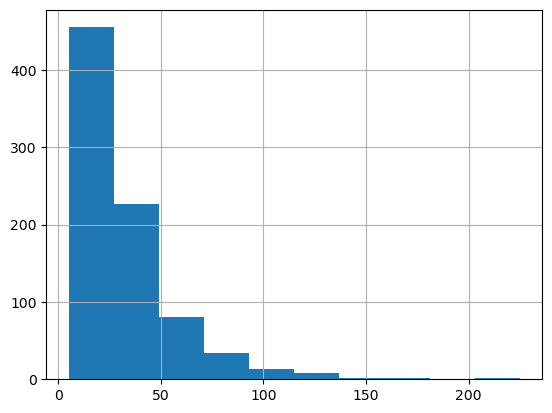

In [48]:
# on trace l'histogramme de la variable 'price'
erp_liaison_web.price.hist()

Cette répartition des valeurs est confirmée par l'histogramme de la variable

## Les  valeurs abérrantes

#### Graphique avec Seaborn

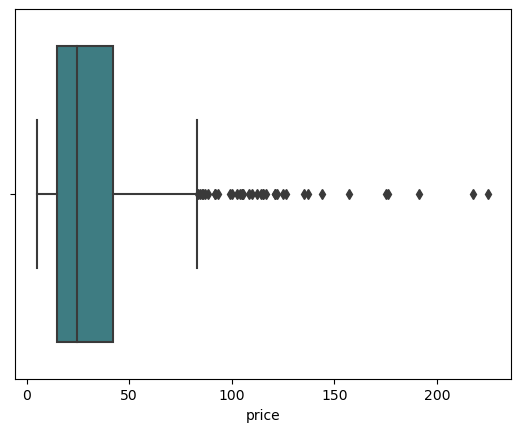

In [49]:
# Representation graphique en boxplot (boite à moustaches):
Boxplot = sns.boxplot(x=erp_liaison_web["price"],palette="crest")

On voit apparaître les valeurs extrêmes au delà du marqueur du maximum (aux environs de 80).

In [50]:
# On oberver les moyennes
mean = erp_liaison_web["price"].mean()
median = erp_liaison_web["price"].median()

- moyenne= somme des valeurs divisée par leur nombre, robuste aux outliers
- médiane= autant de valeur au-dessus qu'en-dessous

Text(0.5, 1.0, 'Répartition des prix')

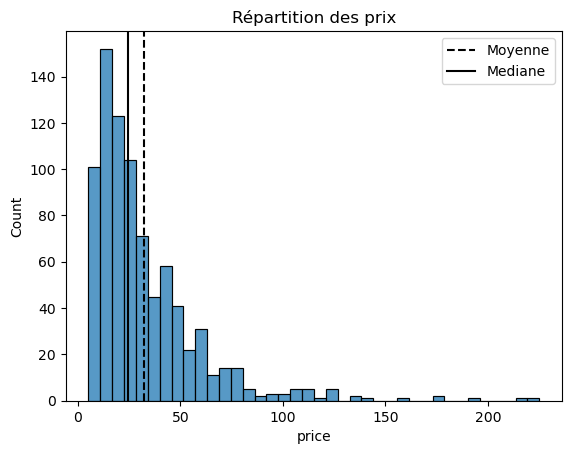

In [51]:
#Representation de la repartition des prix en histogramme:
sns.histplot(data=erp_liaison_web["price"])
plt.axvline(mean, color="black", linestyle="--")
plt.axvline(median, color="black", linestyle="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title("Répartition des prix")

<AxesSubplot:xlabel='price', ylabel='product_id'>

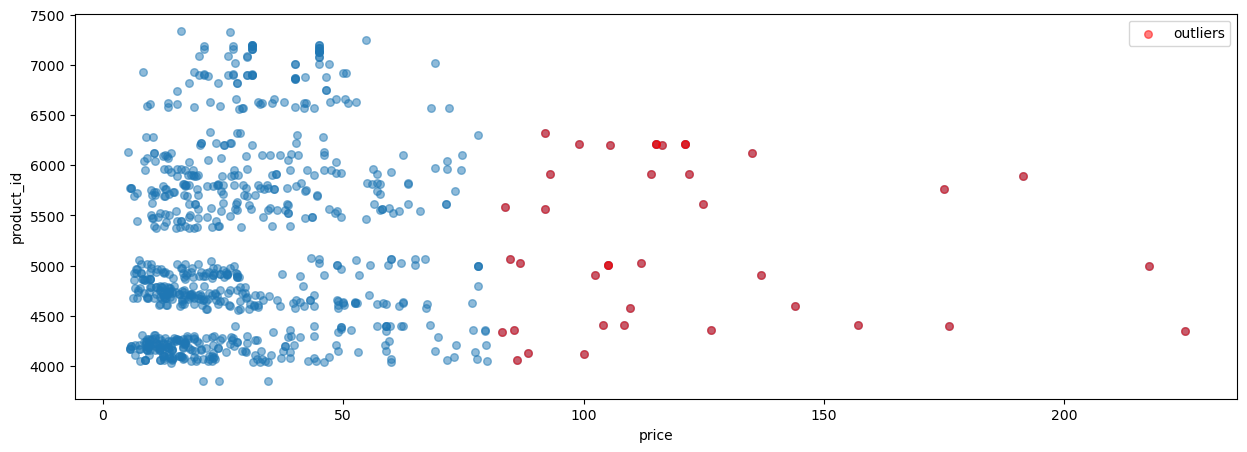

In [52]:
# on définit les outliers comme toute valeur de 'price' supérieure à 80.0
outliers = erp_liaison_web[erp_liaison_web.price.gt(80.0)]

# on trace le scatterplot des prix pour chaque product_id
ax = erp_liaison_web.plot.scatter(x = 'price', y = 'product_id', figsize = (15, 5), s = 30, alpha = 0.5)

# on affiche les outliers en rouge
outliers.plot.scatter(x = 'price', y = 'product_id', color = 'red', ax = ax, label = 'outliers', s = 30, alpha = 0.5)

####  On voit nettement que le dataset est asymétrique car il est >1  
####  Ce qui signifie que nos tableaux vont avoir une tendance à s'étendre sur la droite. 


## Méthode z-score

La cote Z correspond au nombre d'écarts types séparant un résultat de la moyenne

In [53]:
# Créer la dataframe avec les colonnes utiles pour montrer le prix des produits
df_price =  erp_liaison_web[['product_id','id_web','product_id','post_name','total_sales','price']].sort_values(by='price')
df_price.head()

,product_id,id_web,product_id,post_name,total_sales,price
755,6129,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2
189,4173,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7
188,4172,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7
190,4174,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7
664,5777,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7


In [54]:
# création d'une copie du dataframe permetant également un bon nomage
df_zscore = df_price.copy()

In [55]:
# On calcul le z-score pour chaque produit
df_zscore['z_score'] = (df_price['price'] - df_price['price'].mean()) / df_price['price'].std()
df_zscore

,product_id,id_web,product_id,post_name,total_sales,price,z_score
755,6129,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2,-1.015666
189,4173,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7,-0.997007
188,4172,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7,-0.997007
190,4174,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7,-0.997007
664,5777,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7,-0.997007
...,...,...,...,...,...,...,...
657,5767,15185,5767,camille-giroud-clos-de-vougeot-2016,0.0,175.0,5.321136
310,4402,3510,4402,cognac-frapin-vip-xo,13.0,176.0,5.358455
692,5892,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,191.3,5.929439
525,5001,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0.0,217.5,6.907203


In [56]:
# On affiche la liste des produits où le score est supérieur à 2
outliers2 = erp_liaison_web.loc[abs(df_zscore['z_score']) > 2,
         ['product_id', 'post_title', 'price', 'stock_quantity', 'total_sales']].sort_values('price', ascending=False)

outliers2

,product_id,post_title,price,stock_quantity,total_sales
291,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,5.0
525,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,20,0.0
692,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,10,3.0
310,4402,Cognac Frapin VIP XO,176.0,8,13.0
657,5767,Camille Giroud Clos de Vougeot 2016,175.0,12,0.0
313,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,3,0.0
30,4594,NaN,144.0,0,NaN
478,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,13,5.0
752,6126,Champagne Gosset Célébris Vintage 2007,135.0,10,2.0
293,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,11.0


In [57]:
print("Avec la methode Z-score,threshold = 2, on trouve ", len(outliers2), "valeurs outliers pour la variable prix.")

Avec la methode Z-score,threshold = 2, on trouve  34 valeurs outliers pour la variable prix.


##### Le tableau montre les produits qui dépassent la moyenne de prix


## Méthode inter-quartile

 #### L’écart interquartile est une mesure de dispersion qui s'obtient en faisant la différence entre le troisième et le premier quartile.

In [58]:
# On récupère la colonne price sous la forme d'une serie Pandas
price = erp_liaison_web['price']

# On ordonne la serie
price = sorted(price)

# On calcule l'interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

# On calcule les valeurs limite
lower_bound = q1 -(2 * iqr)
upper_bound = q3 +(2 * iqr)
print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

# On cherche les outliers
result = erp_liaison_web[(erp_liaison_web['price'] > upper_bound) | (erp_liaison_web['price'] < lower_bound)]

# On observe
print("")
print("Nombre d'outliers détectés => " + str(len(result)))
result['price']

Q1 => 14.6
Q3 => 42.0
IQR => 27.4
Lower_bound => -40.199999999999996
Upper_bound => 96.8

Nombre d'outliers détectés => 28


30     144.0
154    100.0
291    225.0
293    126.5
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
615    124.8
657    175.0
692    191.3
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

In [59]:
# On remet les prix en ordre croissant
erp_liaison_web_price = erp_liaison_web['price'].sort_values()
# On calcul Q1
Q1 = np.percentile(erp_liaison_web_price, 25)
# On calcul Q3
Q3 = np.percentile(erp_liaison_web_price, 75)
# On calcul l'interquartile (Q3 - Q1)
iqr = Q3 - Q1

In [60]:
# On filtre le data pour garder les produits dont le prix est > Q3 + 2 * icr
outliers = erp_liaison_web.loc[erp_liaison_web['price'] > Q3 + (2 * iqr), ['product_id', 'post_title', 'price', 'stock_quantity', 'total_sales']].sort_values('price', ascending=False)

In [61]:
# On observe les outliers
outliers.head(100)

,product_id,post_title,price,stock_quantity,total_sales
291,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,5.0
525,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,20,0.0
692,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,10,3.0
310,4402,Cognac Frapin VIP XO,176.0,8,13.0
657,5767,Camille Giroud Clos de Vougeot 2016,175.0,12,0.0
313,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,3,0.0
30,4594,NaN,144.0,0,NaN
478,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,13,5.0
752,6126,Champagne Gosset Célébris Vintage 2007,135.0,10,2.0
293,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,11.0


In [62]:
print("Avec la methode IQR, on trouve ", len(outliers), "valeurs outliers pour la variable prix.")

Avec la methode IQR, on trouve  28 valeurs outliers pour la variable prix.


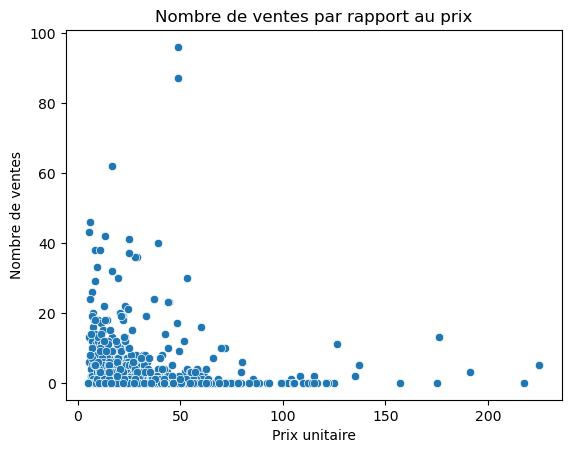

In [63]:
# Pour vérifier la cohérence des prix, on peux aussi vérifier la corrélation entre niveau de prix et niveau de ventes
plt.figure()
plt.title("Nombre de ventes par rapport au prix")
sns.scatterplot(data=erp_liaison_web, x='price', y='total_sales')
plt.xlabel("Prix unitaire")
plt.ylabel("Nombre de ventes")
plt.show()

In [64]:
# On détecte 2 produits avec un niveau de vente élevé, on peut donc vérifier si le prix est cohérent
erp_liaison_web.loc[erp_liaison_web['total_sales'] > 80, ['product_id', 'post_title', 'stock_quantity', 'price', 'total_sales']]

,product_id,post_title,stock_quantity,price,total_sales
162,4144,Champagne Gosset Grand Rosé,11,49.0,87.0
286,4334,Champagne Gosset Grand Blanc de Blancs,0,49.0,96.0


#### Les produits les plus vendus sont dans la tranche symétrique convenue

# Conclusion

#### Nous pouvons définir des valeurs abérrantes au dessus de 80€, et les meilleurs ventes pour 50€.   Mais mon point de vue  sur  la vente de bouteilles de vin est qu'il n'y a pas de réelles abérrations.

#### Le vin est un produit qui peut se décliner en plusieurs catégories de qualités gustative.  Comprenant des références de petites gammes allant jusqu'à du haut de gamme.

#### Il est donc logique que ce type de produit est une clientele moindre lorsque les prix sont élevés, ce qui crée par définition d’éventuelles valeurs aberrantes.

In [65]:
# On osbserve les 10 produits le plus vendus
top_selling = df_price_product.sort_values(by='ca_product', ascending=False).head(10)
top_10_selling = top_selling.filter(items = ['product_id','post_name', 'price' ,'ca_product'])
top_10_selling

,product_id,post_name,price,ca_product
286,4334,champagne-gosset-grand-blanc-de-blanc,49.0,4704.0
162,4144,champagne-gosset-grand-rose,49.0,4263.0
310,4402,cognac-frapin-vip-xo,176.0,2288.0
161,4142,champagne-gosset-grand-millesime-2006,53.0,1590.0
160,4141,gosset-champagne-grande-reserve,39.0,1560.0
293,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,1391.5
291,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,1125.0
170,4153,elian-daros-cotes-du-marmandais-clos-baquey-2015,29.0,1044.0
761,6206,domaine-giudicelli-patrimonio-blanc-2019,25.2,1033.2
121,4068,gilles-robin-crozes-hermitage-papillon-2019,16.6,1029.2
